In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [44]:
from sklearn.linear_model import LinearRegression

In [46]:
from sklearn.metrics import r2_score


In [54]:
import seaborn as sns

In [2]:
data= pd.read_csv("C:/Users/Cyber/Downloads/football_players.csv")
data=pd.DataFrame(data)

In [3]:
data

,nm,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
0,Paul Blair,32,Ligue 1,german,172.0,103671.0,amazing,defender,False,tall,2324698
1,Susan Murphy,29,La Liga,german,178.0,83181.0,decent,midfielder,False,tall,1581684
2,Eric Malone,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,False,tall,2255446
3,Jennifer Hernandez,37,Premier League,german,189.0,154386.0,poor,gk,False,tall,1663689
4,Marcus Campbell,28,Bundesliga,german,173.0,122175.0,amazing,gk,False,tall,1977741
...,...,...,...,...,...,...,...,...,...,...,...
995,Ryan Sampson,28,Bundesliga,brazil,170.0,74749.0,decent,gk,False,medium,1697401
996,Tara Ross,38,Ligue 1,france,184.0,103975.0,decent,attacker,False,medium,2349498
997,Kenneth Jones,33,La Liga,brazil,166.0,103267.0,decent,defender,False,short,1540178
998,Scott Kim,27,Bundesliga,brazil,184.0,103987.0,poor,defender,False,tall,1538843


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nm      1000 non-null   object 
 1   ag      1000 non-null   int64  
 2   lg      1000 non-null   object 
 3   ct      1000 non-null   object 
 4   ht      995 non-null    float64
 5   sf      994 non-null    float64
 6   rt      991 non-null    object 
 7   ps      1000 non-null   object 
 8   bd      1000 non-null   bool   
 9   hr      1000 non-null   object 
 10  pr      1000 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 79.2+ KB


In [5]:
data.isna().sum()

nm    0
ag    0
lg    0
ct    0
ht    5
sf    6
rt    9
ps    0
bd    0
hr    0
pr    0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nm      980 non-null    object 
 1   ag      980 non-null    int64  
 2   lg      980 non-null    object 
 3   ct      980 non-null    object 
 4   ht      980 non-null    float64
 5   sf      980 non-null    float64
 6   rt      980 non-null    object 
 7   ps      980 non-null    object 
 8   bd      980 non-null    bool   
 9   hr      980 non-null    object 
 10  pr      980 non-null    int64  
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 85.2+ KB


In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,ag,ht,sf,pr
count,980.000000,980.000000,980.000000,9.800000e+02
mean,29.596939,174.368367,101277.736735,2.034580e+06
std,4.875340,6.916105,48080.039384,5.396609e+05
min,16.000000,150.000000,10000.000000,9.428260e+05
25%,26.000000,170.000000,67106.000000,1.700312e+06
50%,30.000000,175.000000,99676.500000,1.970798e+06
75%,33.000000,179.000000,135490.750000,2.212384e+06
max,43.000000,196.000000,238298.000000,4.526583e+06


In [10]:
data['lg'].unique()

array(['Ligue 1', 'La Liga', 'Bundesliga', 'Premier League', 'Serie A'],
      dtype=object)

In [11]:
data['rt'].unique()

array(['amazing', 'decent', 'poor'], dtype=object)

In [12]:
x=data[['ag', 'ht', 'sf']]
x

,ag,ht,sf
0,32,172.0,103671.0
1,29,178.0,83181.0
2,33,172.0,164118.0
3,37,189.0,154386.0
4,28,173.0,122175.0
...,...,...,...
995,28,170.0,74749.0
996,38,184.0,103975.0
997,33,166.0,103267.0
998,27,184.0,103987.0


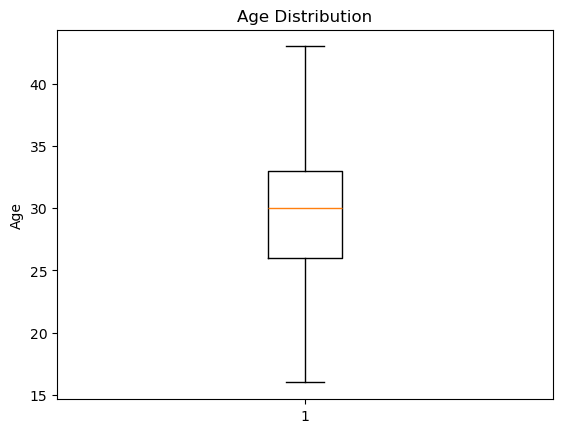

In [13]:
plt.boxplot(data['ag'])
plt.title('Age Distribution')
plt.ylabel('Age')
plt.show()

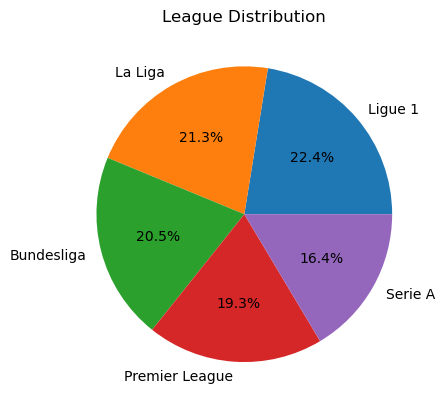

In [14]:
plt.pie(data['lg'].value_counts(), labels=data['lg'].unique(), autopct='%1.1f%%')
plt.title('League Distribution')
plt.show()

<BarContainer object of 7 artists>

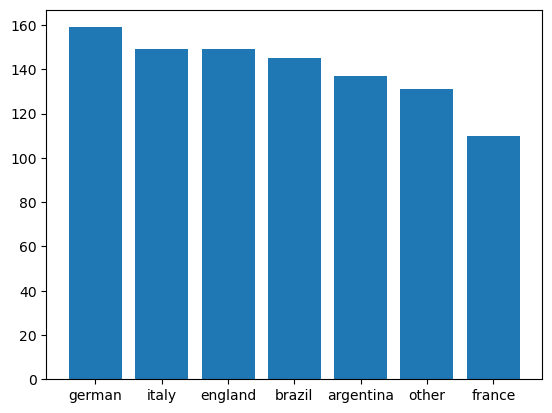

In [15]:
plt.bar(data['ct'].value_counts().index, data['ct'].value_counts().values)

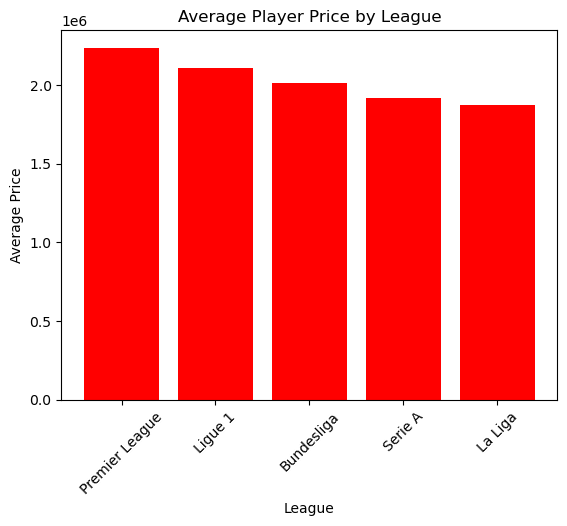

In [16]:
league_pl_pr=data.groupby('lg')['pr'].mean().sort_values(ascending=False)
plt.bar(league_pl_pr.index, league_pl_pr.values, color='red')
plt.title('Average Player Price by League')
plt.xlabel('League')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [18]:
x=data.drop(columns=['nm','hr', 'pr'])
x

,ag,lg,ct,ht,sf,rt,ps,bd
0,32,Ligue 1,german,172.0,103671.0,amazing,defender,False
1,29,La Liga,german,178.0,83181.0,decent,midfielder,False
2,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,False
3,37,Premier League,german,189.0,154386.0,poor,gk,False
4,28,Bundesliga,german,173.0,122175.0,amazing,gk,False
...,...,...,...,...,...,...,...,...
995,28,Bundesliga,brazil,170.0,74749.0,decent,gk,False
996,38,Ligue 1,france,184.0,103975.0,decent,attacker,False
997,33,La Liga,brazil,166.0,103267.0,decent,defender,False
998,27,Bundesliga,brazil,184.0,103987.0,poor,defender,False


In [19]:
y=data['pr']
y

0      2324698
1      1581684
2      2255446
3      1663689
4      1977741
        ...   
995    1697401
996    2349498
997    1540178
998    1538843
999    1529895
Name: pr, Length: 980, dtype: int64

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
def preprocess_data(xtrain, xtest,choice,col):
    if choice==0:
        One_h_enc=OneHotEncoder(sparse_output=False, drop='first')
        encoded_ct=One_h_enc.fit_transform(xtrain[[col]])
        encoded_ct=pd.DataFrame(encoded_ct, columns=One_h_enc.get_feature_names_out([col]))
        xtrain=pd.concat([xtrain.reset_index(drop=True), encoded_ct.reset_index(drop=True)], axis=1).drop(columns=[col])
        
        encoded_ct_test=One_h_enc.transform(xtest[[col]])
        encoded_ct_test=pd.DataFrame(encoded_ct_test, columns=One_h_enc.get_feature_names_out([col]))
        xtest=pd.concat([xtest.reset_index(drop=True), encoded_ct_test.reset_index(drop=True)], axis=1).drop(columns=[col])
        
    elif choice==1:
        label_enc=LabelEncoder()
        xtrain[col]=label_enc.fit_transform(xtrain[col])
        xtest[col]=label_enc.transform(xtest[col])
        
    return xtrain, xtest

In [35]:
xtrain , xtest=preprocess_data(xtrain, xtest, 0, 'ct')
xtrain

,ag,lg,ht,sf,rt,ps,bd,ct_brazil,ct_england,ct_france,ct_german,ct_italy,ct_other
0,29,Serie A,173.0,64049.0,amazing,defender,False,0.0,0.0,0.0,0.0,0.0,0.0
1,24,Ligue 1,185.0,97061.0,amazing,attacker,False,0.0,1.0,0.0,0.0,0.0,0.0
2,24,Ligue 1,182.0,145800.0,decent,defender,False,0.0,0.0,0.0,0.0,0.0,0.0
3,33,Ligue 1,181.0,30728.0,decent,gk,False,0.0,0.0,0.0,0.0,0.0,1.0
4,34,Ligue 1,182.0,13308.0,amazing,gk,False,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,20,Bundesliga,174.0,77344.0,amazing,defender,False,0.0,0.0,1.0,0.0,0.0,0.0
780,30,Bundesliga,187.0,10163.0,decent,gk,False,1.0,0.0,0.0,0.0,0.0,0.0
781,35,Ligue 1,183.0,25190.0,amazing,attacker,False,0.0,0.0,0.0,0.0,1.0,0.0
782,19,Ligue 1,169.0,18930.0,amazing,gk,False,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
xtest

,ag,lg,ht,sf,rt,ps,bd,ct_brazil,ct_england,ct_france,ct_german,ct_italy,ct_other
0,27,Serie A,183.0,107982.0,poor,gk,False,0.0,0.0,1.0,0.0,0.0,0.0
1,27,Serie A,184.0,86892.0,decent,attacker,False,0.0,0.0,1.0,0.0,0.0,0.0
2,30,Ligue 1,170.0,103857.0,decent,midfielder,False,0.0,0.0,0.0,0.0,0.0,0.0
3,31,La Liga,182.0,172293.0,decent,midfielder,False,0.0,0.0,0.0,0.0,1.0,0.0
4,26,La Liga,172.0,57024.0,decent,attacker,False,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,30,Serie A,165.0,17231.0,amazing,gk,False,0.0,0.0,0.0,1.0,0.0,0.0
192,24,Serie A,190.0,88605.0,decent,defender,False,0.0,0.0,1.0,0.0,0.0,0.0
193,28,Serie A,176.0,110647.0,amazing,attacker,False,1.0,0.0,0.0,0.0,0.0,0.0
194,30,La Liga,179.0,57059.0,decent,midfielder,False,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
xtrain,xtest=preprocess_data(xtrain, xtest, 1, 'rt')
xtrain ,xtest=preprocess_data(xtrain, xtest, 0, 'ps')
xtrain, xtest=preprocess_data(xtrain, xtest, 0, 'lg')
xtrain, xtest=preprocess_data(xtrain, xtest, 1, 'bd')

In [39]:
xtrain

,ag,ht,sf,rt,bd,ct_brazil,ct_england,ct_france,ct_german,ct_italy,ct_other,ps_defender,ps_gk,ps_midfielder,lg_La Liga,lg_Ligue 1,lg_Premier League,lg_Serie A
0,29,173.0,64049.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24,185.0,97061.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,24,182.0,145800.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33,181.0,30728.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,34,182.0,13308.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,20,174.0,77344.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
780,30,187.0,10163.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
781,35,183.0,25190.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
782,19,169.0,18930.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [40]:
xtest

,ag,ht,sf,rt,bd,ct_brazil,ct_england,ct_france,ct_german,ct_italy,ct_other,ps_defender,ps_gk,ps_midfielder,lg_La Liga,lg_Ligue 1,lg_Premier League,lg_Serie A
0,27,183.0,107982.0,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,27,184.0,86892.0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30,170.0,103857.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,31,182.0,172293.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,26,172.0,57024.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,30,165.0,17231.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
192,24,190.0,88605.0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
193,28,176.0,110647.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194,30,179.0,57059.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [43]:
scaler=StandardScaler()
xtrain['sf']=scaler.fit_transform(xtrain[['sf']])
xtest['sf']=scaler.transform(xtest[['sf']])
xtrain['ht']=scaler.fit_transform(xtrain[['ht']])
xtest['ht']=scaler.transform(xtest[['ht']])


In [59]:
fulltable=pd.concat([xtrain, ytrain.reset_index(drop=True)], axis=1)

<Figure size 2000x2000 with 0 Axes>

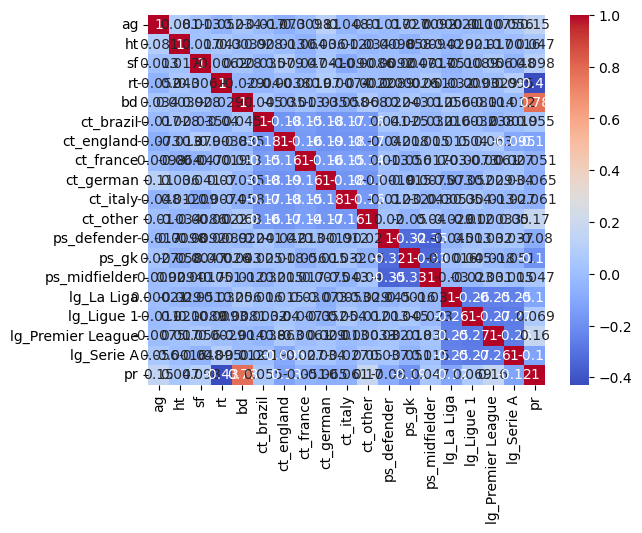

In [61]:
corr=fulltable.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.Figure(figsize=(20,20))

In [ ]:
lr=LinearRegression(positive=False)
lr.fit(xtrain, ytrain)
y_pred=lr.predict(xtest)

In [69]:
r2_score(ytest, y_pred)

0.9611992562222543